In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("bondwindowdressing.ipynb")

# Quantitative Research Lab: Discovering Trade Ideas

This lab assignment aims to help guide you through the process of analyzing data to discover potential trading ideas in financial markets

# Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection

To start, we're going to collect the data we need to analyze the effect. 

We'll use yfinance, a popular python library for accessing the yahoo finance API for asset price data

In [3]:
# BEGIN SOLUTION NO PROMPT
import yfinance as yf

# Define the ticker symbol for TLT
ticker_symbol = "TLT"

start_date = "2002-12-31"  
end_date = "2023-01-01"    

# Use yfinance to download the data
tlt_data = yf.download("TLT", start=start_date, end=end_date)
tltraw = pd.DataFrame(tlt_data)
tltraw

# END SOLUTION
""" # BEGIN PROMPT
import yfinance as yf

# Define the ticker symbol as TLT
ticker_symbol = "TLT"

start_date = "2002-12-31"  
end_date = "2023-01-01"    

# fill in the correct parameters for the download function
# yf.download (asset_symbol_to_download, start= ..., end=...)
tlt_data = yf.download(..., start=..., end=...)

# turn the data into a dataframe
tltraw = pd.DataFrame()
tltraw

""" # END PROMPT

[*********************100%%**********************]  1 of 1 completed


' # BEGIN PROMPT\nimport yfinance as yf\n\n# Define the ticker symbol as TLT\nticker_symbol = "TLT"\n\nstart_date = "2002-12-31"  \nend_date = "2023-01-01"    \n\n# fill in the correct parameters for the download function\n# yf.download (asset_symbol_to_download, start= ..., end=...)\ntlt_data = yf.download(..., start=..., end=...)\n\n# turn the data into a dataframe\ntltraw = pd.DataFrame()\ntltraw\n\n'

In [4]:
grader.check("q1")

q1 results: All test cases passed!

let's plot the data, to see how it looks!

<Axes: xlabel='Date'>

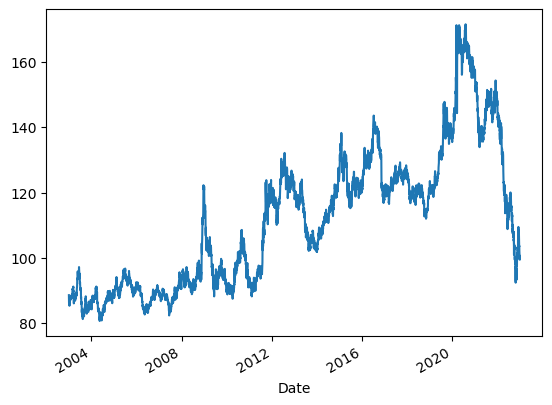

In [5]:
tltraw['Close'].plot()

<Axes: xlabel='Date'>

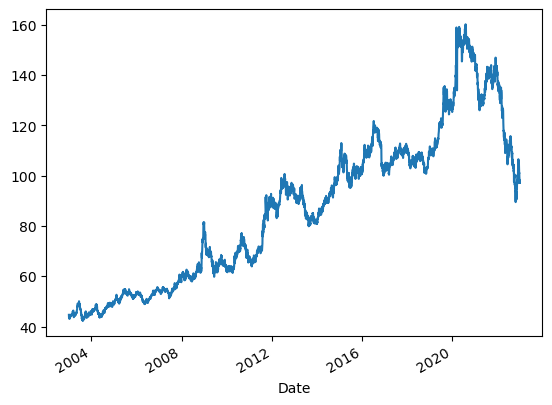

In [6]:
tltraw['Adj Close'].plot()

In [7]:
# adjusted close is basically just the close price, adjusted for stock splits and dividends
# the adjusted close price is what you would actually be able to trade, so that's what we look at

### Log vs Simple Returns

[-0.02619637  0.00231582 -0.00266267 ...  0.01128712 -0.01118684
  0.        ]


<Axes: xlabel='Date'>

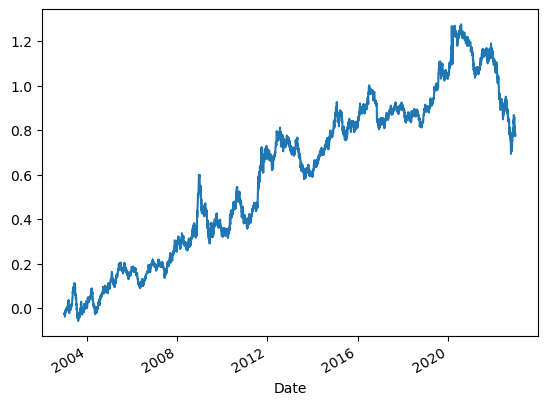

In [8]:
def simplereturn(x0,x1):
    return (x1-x0)/x0
def logreturn(x0,x1):
    return np.log(x1/x0)
def logtosimple(r):
    return np.exp(r)-1
def simpletolog(r):
    return np.log(r+1)

tltdf = tltraw[['Adj Close']]
tltdflen = len(tltdf['Adj Close'])
tltdflog = np.zeros(tltdflen)

for i in range(0,tltdflen-1):
    tltdflog[i] = logreturn(tltdf['Adj Close'][i],tltdf['Adj Close'][i+1])

print(tltdflog)

tltdf['logreturn'] = tltdflog
tltdf
tltdf['logreturn'].cumsum().plot()

In [9]:
grader.check("q2")

q2 results: All test cases passed!

# Exploring Effect

since we're looking at an effect that happens during the beginning and end of a month, we'll want to start by grouping our data based on the day of the month

In [10]:
tltdf['dayofmonth'] = tltraw.index.day # use the index of the dataframe, and the .day accessor

dom_mean_logret = tltdf.groupby('dayofmonth').mean()['logreturn'] # input the correct column to group on, column to view, and aggregation function

print(dom_mean_logret)

dayofmonth
1    -0.000368
2    -0.001773
3    -0.000027
4    -0.002175
5     0.000110
6    -0.000149
7    -0.000575
8    -0.001369
9    -0.000265
10    0.000540
11   -0.000885
12    0.000442
13    0.000935
14    0.001205
15    0.000525
16    0.000513
17    0.000344
18    0.000262
19    0.000838
20    0.000449
21    0.001516
22    0.000413
23    0.000099
24   -0.000128
25    0.001096
26    0.000602
27    0.000901
28    0.000168
29    0.000068
30    0.001390
31    0.000095
Name: logreturn, dtype: float64


In [11]:
grader.check("q3")

q3 results:
    q3 - 1 result:
        ❌ Test case failed
        Trying:
            assert(np.isclose(tltdf.groupby('dayofmonth').mean()['logreturn'].sum(), 0.005626961357926597))
        Expecting nothing
        **********************************************************************
        Line 1, in q3 0
        Failed example:
            assert(np.isclose(tltdf.groupby('dayofmonth').mean()['logreturn'].sum(), 0.005626961357926597))
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\patel\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3 0[0]>", line 1, in <module>
                assert(np.isclose(tltdf.groupby('dayofmonth').mean()['logreturn'].sum(), 0.005626961357926597))
            AssertionError

Not sure why this fails the grader test :/

now that we've grouped the data successfully, we'll look at the average logreturn by day, to see if anything interesting pops out

# what do you expect to see in the data? 

<BarContainer object of 31 artists>

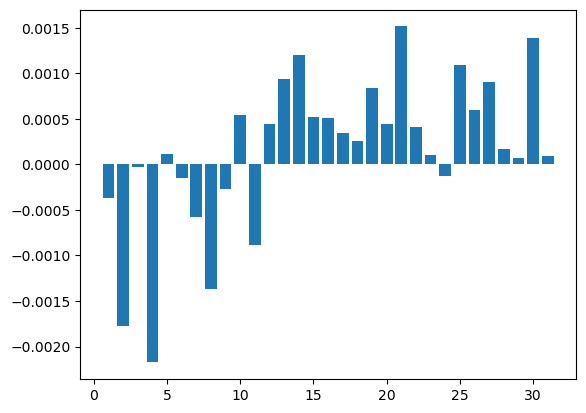

In [12]:
plt.bar(dom_mean_logret.index, dom_mean_logret)

# what do you notice in the data? 

It is clear that at the start of the month the return is much lower than the return at the end of the month.

# coming up with a basic trading rule

In [13]:


# we'll first want to group the data by months, as we're studying a month by month effect

# you can pass lists into groupby!

tltdf_months = tltdf.groupby([tltdf.index.month, tltdf.index.year])

# now, we want to create a function that we can apply to each group
# test out what one of the groups looks like, see what september 2022 looks like

sep2022 = tltdf_months.get_group((9,2022))
# try to get the sum of the log returns of the first and last 5 days
# hint: use the pandas iloc accessor

last_5_long_922 = sep2022.iloc[-5:].sum()
first_5_short_922 = sep2022.iloc[:5].sum()
print(last_5_long_922)
print(first_5_short_922)

Adj Close     497.983604
logreturn       0.003830
dayofmonth    140.000000
dtype: float64
Adj Close     526.372162
logreturn      -0.011840
dayofmonth     24.000000
dtype: float64


In [14]:
grader.check("q4")

q4 results: All test cases passed!

calculate what would happen if we were long during the last five months, and short during the first five months

In [15]:

# generalize the above into a function that we can run on every group (test it on september 2022: you should get the same number as before)
def calculate_returns(group, n_days):
    # when we're long, last n days
    last_5_sum = group.iloc[-n_days:].sum()
    # when we're short, first n days
    first_5_sum = group.iloc[:n_days].sum()
    # combine
    return last_5_sum - first_5_sum
    
print(calculate_returns(sep2022, 5))

# now let's apply it to every month in the data
jan2005 = tltdf_months.get_group((1,2005))
print(calculate_returns(jan2005, 5))

monthly_returns = tltdf_months.apply(calculate_returns, 5)
monthly_returns = monthly_returns.drop(columns=['Adj Close', 'dayofmonth'])
monthly_returns


Adj Close     -28.388557
logreturn       0.015670
dayofmonth    116.000000
dtype: float64
Adj Close       7.382545
logreturn       0.011927
dayofmonth    112.000000
dtype: float64


logreturn
Date Date           
1    2003   0.017313
     2004  -0.029208
     2005   0.011927
     2006   0.002135
     2007   0.006338
...              ...
12   2018  -0.018741
     2019  -0.001214
     2020   0.002604
     2021  -0.004975
     2022  -0.057514

[241 rows x 1 columns]

In [16]:
grader.check("q5")

q5 results:
    q5 - 1 result:
        ❌ Test case failed
        Trying:
            assert((calculate_returns(sep2022, 5) < 0.0014) and (calculate_returns(sep2022, 5) > 0.0011))
        Expecting nothing
        **********************************************************************
        Line 1, in q5 0
        Failed example:
            assert((calculate_returns(sep2022, 5) < 0.0014) and (calculate_returns(sep2022, 5) > 0.0011))
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\patel\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5 0[0]>", line 1, in <module>
                assert((calculate_returns(sep2022, 5) < 0.0014) and (calculate_returns(sep2022, 5) > 0.0011))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "C:\Users\patel\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1466, in __nonzero__
                raise ValueError(
            ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

    q5 - 2 result:
        ❌ Test case failed
        Trying:
            assert((monthly_returns.sum() < 1.78) and (monthly_returns.sum() > 1.76))
        Expecting nothing
        **********************************************************************
        Line 1, in q5 1
        Failed example:
            assert((monthly_returns.sum() < 1.78) and (monthly_returns.sum() > 1.76))
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\patel\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5 1[0]>", line 1, in <module>
                assert((monthly_returns.sum() < 1.78) and (monthly_returns.sum() > 1.76))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "C:\Users\patel\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1466, in __nonzero__
                raise ValueError(
            ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

here's a visualization

<Axes: xlabel='Date,Date'>

<Figure size 1200x600 with 0 Axes>

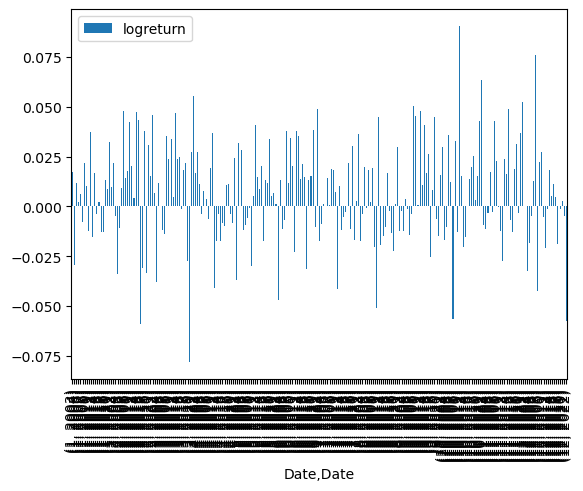

In [17]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
monthly_returns.plot(kind='bar')

since we can add log returns, we add up all the log returns in the above to see how the strategy does over time

### where do you expect the strategy to do well? when do you expect it to do worse?

<Axes: xlabel='Date,Date'>

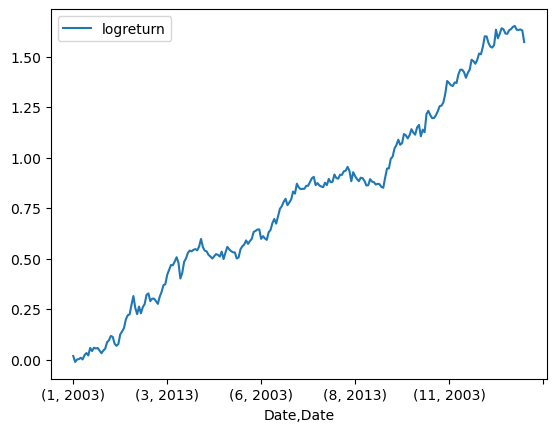

In [18]:
monthly_returns.cumsum().plot()

### where did  the strategy do well? where did it do worse?

Our strategy does much better at the end of the year compared to the beginning of the year.

### what's missing from this that makes it not a 'backtest'? why wouldn't we make this much money if we started trading this today?

This backtest simply looks at the logreturn over time, however, it does not take into account the changes in the risk free and inflation rates. If we started trading this method today we would likely run into many backtesting problems such as lack of incorporation of market impact, look-ahead bias, non-instant trading, and slippage & fees.

# Risk Premia Effect?

maybe the returns at the end of the month are higher because we see bigger movements at the end of the month

how can we test this?

<BarContainer object of 31 artists>

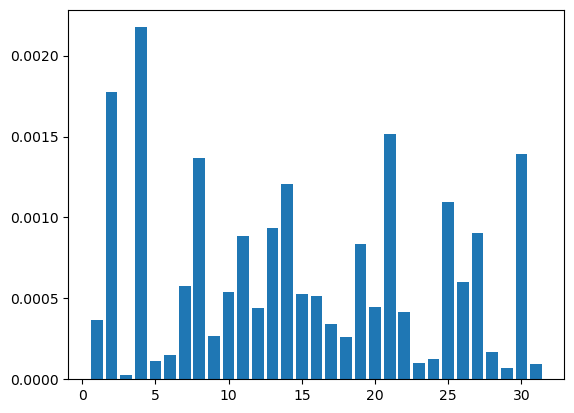

In [19]:
mean_log = tltdf.groupby('dayofmonth').mean()['logreturn']
abs_mean_log = np.abs(mean_log)
plt.bar(abs_mean_log.index, abs_mean_log)

### what does the data show? do you think this effect is a risk premia?

This data does show that there is more volatility during the beginning of the month compared to the end of the month. This effect is a risk premia because higher volatility could lead to higher returns.

# Other Assets?

lets generalize some of our functions from before, so they're easier to use in the future

[*********************100%%**********************]  1 of 1 completed
             Adj Close  logreturn
Date                             
2002-12-31   59.452854   0.031681
2003-01-02   61.366520   0.003070
2003-01-03   61.555229   0.017471
2003-01-06   62.640114  -0.002477
2003-01-07   62.485134  -0.014556
...                ...        ...
2022-12-23  378.706665  -0.003951
2022-12-27  377.213226  -0.012506
2022-12-28  372.525238   0.017840
2022-12-29  379.230835  -0.002638
2022-12-30  378.231873   0.000000

[5036 rows x 2 columns]


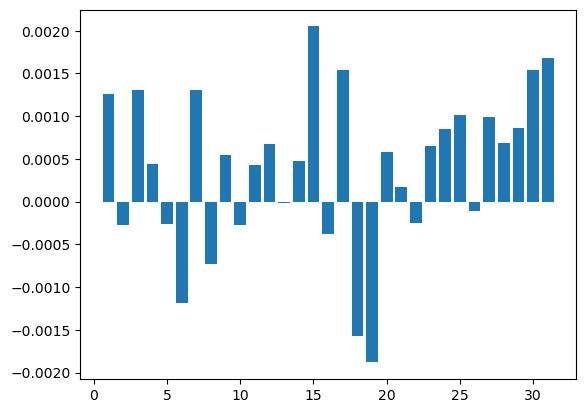

In [20]:

# lets make the downloading and preprocessing data easy to use

def processData(ticker, start_date = "2002-12-31", end_date = "2023-01-01"):
    # get data
    ticker_data = yf.download(ticker, start=start_date, end=end_date)
    ticker_raw = pd.DataFrame(ticker_data)
    
    # add log return column
    tickerdf = ticker_raw[['Adj Close']]
    tickerdflen = len(tickerdf['Adj Close'])
    tickerdflog = np.zeros(tickerdflen)

    for i in range(0,tickerdflen-1):
        tickerdflog[i] = logreturn(tickerdf['Adj Close'][i],tickerdf['Adj Close'][i+1])

    tickerdf['logreturn'] = tickerdflog
    return tickerdf
    
spydf = processData(ticker="SPY")
print(spydf)

# we can also make our plotting returns by day of month function easy to use so we can run analysis quickly

def plot_mean_dom_return(df):
    df['dayofmonth'] = df.index.day 
    dom_mean_logret = df.groupby('dayofmonth').mean()['logreturn']
    plt.bar(dom_mean_logret.index, dom_mean_logret)
    return dom_mean_logret

plot_mean_dom_return(spydf)
    
def df_months(df):
    df_months = df.groupby([df.index.month, df.index.year])
    return df_months

df_months = df_months(spydf)

spy_monthly_returns = df_months.apply(calculate_returns, 5)

# refer to how you did these things above, so you can apply it here!

In [21]:
grader.check("q6")

q6 results:
    q6 - 1 result:
        ✅ Test case passed

    q6 - 2 result:
        ❌ Test case failed
        Trying:
            assert((spy_monthly_returns.sum() > -0.119) and (spy_monthly_returns.sum() < -0.117))
        Expecting nothing
        **********************************************************************
        Line 1, in q6 1
        Failed example:
            assert((spy_monthly_returns.sum() > -0.119) and (spy_monthly_returns.sum() < -0.117))
        Exception raised:
            Traceback (most recent call last):
              File "C:\Users\patel\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q6 1[0]>", line 1, in <module>
                assert((spy_monthly_returns.sum() > -0.119) and (spy_monthly_returns.sum() < -0.117))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "C:\Users\patel\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1466, in __nonzero__
                raise ValueError(
            ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Other Ideas?

use this notebook as a playground to explore this data and effect further, if you'd like to!

In [22]:
print(tltraw.index.day)

Index([31,  2,  3,  6,  7,  8,  9, 10, 13, 14,
       ...
       16, 19, 20, 21, 22, 23, 27, 28, 29, 30],
      dtype='int32', name='Date', length=5036)


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [24]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: C:\Users\patel\anaconda3\Lib\site-packages\zmq\_future.py:679: RuntimeWarning: Proactor event loop does not implement add_reader family of methods required for zmq. Registering an additional selector thread for add_reader support via tornado. Use `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())` to avoid this warning.
  self._get_loop()
